# Credit Card Application

Banks and financial institutions often need to predict customer behavior, such as the likelihood of a customer accepting a loan offer, to target their marketing efforts effectively. This helps in increasing the acceptance rate of their offers while reducing marketing costs.

Our objective is to create a model that forecasts the propensity (probability) of customers responding to a personal loan campaign, we will utilize logistic regression. The outcomes will be categorized, and the factors influencing the answer will be found using the model's probability. Building a model that identifies clients who are most likely to accept the loan offer in upcoming personal loan campaigns is the objective.

We import necessary libraries to handle data manipulation, visualization, and model building. These libraries provide functions to simplify complex operations, ensuring efficient data processing and analysis.

# Grading Scheme:

1. **Importing Libraries and Data (10 points)**
   - Correctly import all required libraries; remove any unncessary libraries: 5 points
   - Correctly read the dataset: 5 points

2. **Data Exploration (20 points)**
   - Correctly display dimensions, first and last entries: 10 points
   - Correctly display descriptive statistics: 10 points

3. **Handling Missing Values (20 points)**
   - Correctly impute missing numeric values: 10 points
   - Correctly impute missing non-numeric values: 10 points

4. **Data Pre-processing (20 points)**
   - Correctly encode non-numeric data: 10 points
   - Correctly plot histograms and heatmap: 10 points

5. **Model Building (30 points)**
   - Correctly split data into train and test sets: 10 points
   - Correctly scale the data: 10 points
   - Correctly build and fit the logistic regression model: 10 points

6. **Model Evaluation (30 points)**
   - Correctly calculate and display confusion matrix: 10 points
   - Correctly calculate and plot the ROC curve: 20 points
 
7. **Answering Red Questions**
   - Correctly answer all subjective questions in red: 20 points


Total: 150 points

## 1. Importing Libraries

**Work done:**

Jack Gonzalez: Made initial draft of code

Jason Huang: Fixed some code and answered questions

Arjun Totre: Fixed some code and answered questions

Davis Gorman: New to group

Nico De Amilibia: Unsure

In [1]:
# KEEP ONLY THE REQUIRED LIBRARIES; REMOVE OTHERS
# removed all libraries that aren't necessary(we are only doing logistic regressions/modeling data)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression

## <span style="color:red">*Q1. Why only the required libraries are kept in the code?*</span>

Only the required libraries are kept in the code because it makes the code cleaner if there isn't just a billion imports in the beginning of the code, most of which don't do anything to help us. Also, if us in the future wanted to go back through the code, having only the necessary imports can help us understand what is doing what and why. In addition, having different libraries that both do the same thing can sometimes have conflicting function names(you do NOT want to have two libraries tryingg to call the same function.) Having less libraries in the code also means less things that other people using your code might need to download, which will prevent others from having to download a bunch of things that weren't needed.


## 2) Importing and Descriptive Stats

To market their loan products to people who already have deposit accounts, BankABC wants to create a direct marketing channel. To cross-sell personal loans to its current clients, the bank ran a test campaign. An enticing personal loan offer and processing charge waiver were aimed at a random group of 20000 clients. The targeted clients' information has been provided, together with information on how they responded to the marketing offer.

In [2]:
# READ DATA 

df = pd.read_csv('C:/Users/tif28/Documents/Brown Datasets/Approval.csv')  #df is the variable for the dataframe
# NOTE @GROUP This line might need to be changed so that the file is called properly

df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


**Instructions:**
1. Get the dimensions of the array and print them.
2. Verify if the correct dataset was imported by checking the first 15 entries.
3. Verify by checking the last five entries.
4. Display descriptive statistics of the dataset.

In [3]:
# GETTING THE DIMENSIONS OF THE ARRAY
df.shape

(690, 16)

In [4]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST 15 ENTRIES OF THE DATA(starts @ 0)
df.head(15)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


In [5]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE LAST FIVE ENTRIES OF THE DATA
df.tail(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0
689,1,35.00,3.375,1,1,Energy,Black,8.29,0,0,0,1,ByBirth,0,0,0


In [6]:
# DESCRIPTIVE STATS
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [7]:
# DESCRIPTIVE STATS
df.describe() #Wasn't able to get the exact output as shown in the answer key, but this is still a descriptive statistic that gives us a statistical summary of the data frame(df)

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


## 3) Handling Missing Values

Missing values in the dataset can lead to incorrect analysis and model predictions. Imputing missing values ensures the integrity of the dataset, making it possible to build reliable models.

**Instructions:**
1. Check for missing values.
2. Impute missing values for numeric data using the mean and for non-numeric data using the mode.

In [8]:
# CHECK FOR MISSING VALUES
df.isnull().sum()
#no missing values shown here

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [9]:
# IMPUTE MISSING VALUES using mean
#there are no missing values but I wasn't sure if we had to do this anyways so I just put this code here
for col in df.columns:
    if df[col].dtypes != "object":
        df[col] = df[col].fillna(df[col].mean())



In [10]:
# For non numeric data using mode
#there are no missing values but I wasn't sure if we had to do this anyways so I just put this code here
for col in df.columns:
    if df[col].dtypes == "object":
        df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
df.head(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.250,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.040,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.500,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.750,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.710,1,0,0,0,ByOtherMeans,120,0,1
5,1,32.08,4.000,1,1,CommunicationServices,White,2.500,1,0,0,1,ByBirth,360,0,1
6,1,33.17,1.040,1,1,Transport,Black,6.500,1,0,0,1,ByBirth,164,31285,1
7,0,22.92,11.585,1,1,InformationTechnology,White,0.040,1,0,0,0,ByBirth,80,1349,1
8,1,54.42,0.500,0,0,Financials,Black,3.960,1,0,0,0,ByBirth,180,314,1
9,1,42.50,4.915,0,0,Industrials,White,3.165,1,0,0,1,ByBirth,52,1442,1


## <span style="color:red">*Q2. Is there any missing data at all?*</span>

No, there is no missingg data in our data set. 

## <span style="color:red">*Q3. Why do we impute mean for numeric and mode for non-numeric data?*</span>

We use the mean for numeric data because the mean is a calculation of the average value, which can only be used on numeric values. Replacing missing values with the mean value makes sense since we are basically just replacing missing values with the average value, keeping the data consistent. We use the mode for  non-numeric data because you can't exactly calculate the average of something that isn't a number, so instead you use the mode since the mode is the most frequently occuring value, basically achieving the same job as the mean in numeric data. Imputing mean and mode also gives us more data to work with, since otherwise you might have to remove parts of the data.

## 4) Data Preprocessing

Data preprocessing is crucial for preparing raw data for analysis. Converting non-numeric data to numeric forms, such as one-hot encoding, ensures compatibility with machine learning algorithms, which typically require numerical input.

In [12]:
# CONVERTING ALL NON-NUMERIC DATA TO NUMERIC - USING ONE-HOT ENCODING

# INSTANTIATE LABELENCODER
ohe = OneHotEncoder(sparse_output=False)

# USE LABEL ENCODER le TO TRANSFORM VARIABLES

# Creating a new DataFrame for storing transformed data
data_transformed = pd.DataFrame()
'''
for column in df.columns:
    if df[column].dtypes == 'object':
        # One-hot encode the column if it's object type
        transform = ohe.fit_transform(df[[column]])
        # Set the column name of one-hot encoded DataFrame as column_value
        df_transformed = pd.DataFrame(transform, columns=ohe.get_feature_names_out([column]))
        # Concatenate to the transformed DataFrame
        data_transformed = pd.concat([data_transformed, df_transformed], axis = 1)
    else:
        # If not object type, just copy the data
        data_transformed[column]=df[column]
''' #JH: I don't know why, but this fails to encode certain columns like Citizen
#tried to fix it but it still wouldn't work.

column = df.select_dtypes(include=['object']).columns.tolist() #This puts columns with objects into a list to encode

transform = ohe.fit_transform(df[column]) #these 3 lines are pretty much the same
df_transformed = pd.DataFrame(transform, columns=ohe.get_feature_names_out(column))
df_transformed = pd.concat([df, df_transformed], axis=1)

df_transformed = df_transformed.drop(column, axis=1) #This removes the un-encoded columns
#This was done with help from a Geekstogeeks article
df = df_transformed

print(df)
#Arjun Totre: I used Stack overflow as well as some segments from chatgpt and gemini to help me with this. I'm not going to lie I forgot to notate which lines are from which because this took  me a 
#while to get working, but just know that some of this is not written by me(I mostly used them to understand the functions within OneHotEncoder). 

     Gender    Age    Debt  Married  BankCustomer  YearsEmployed  \
0         1  30.83   0.000        1             1           1.25   
1         0  58.67   4.460        1             1           3.04   
2         0  24.50   0.500        1             1           1.50   
3         1  27.83   1.540        1             1           3.75   
4         1  20.17   5.625        1             1           1.71   
..      ...    ...     ...      ...           ...            ...   
685       1  21.08  10.085        0             0           1.25   
686       0  22.67   0.750        1             1           2.00   
687       0  25.25  13.500        0             0           2.00   
688       1  17.92   0.205        1             1           0.04   
689       1  35.00   3.375        1             1           8.29   

     PriorDefault  Employed  CreditScore  DriversLicense  ...  \
0               1         1            1               0  ...   
1               1         1            6             

## 5) Data Visualization

**Instructions:**
1. Plot histograms for all variables to understand their distributions.
2. Calculate the correlation matrix and plot the heatmap to identify relationships between variables.

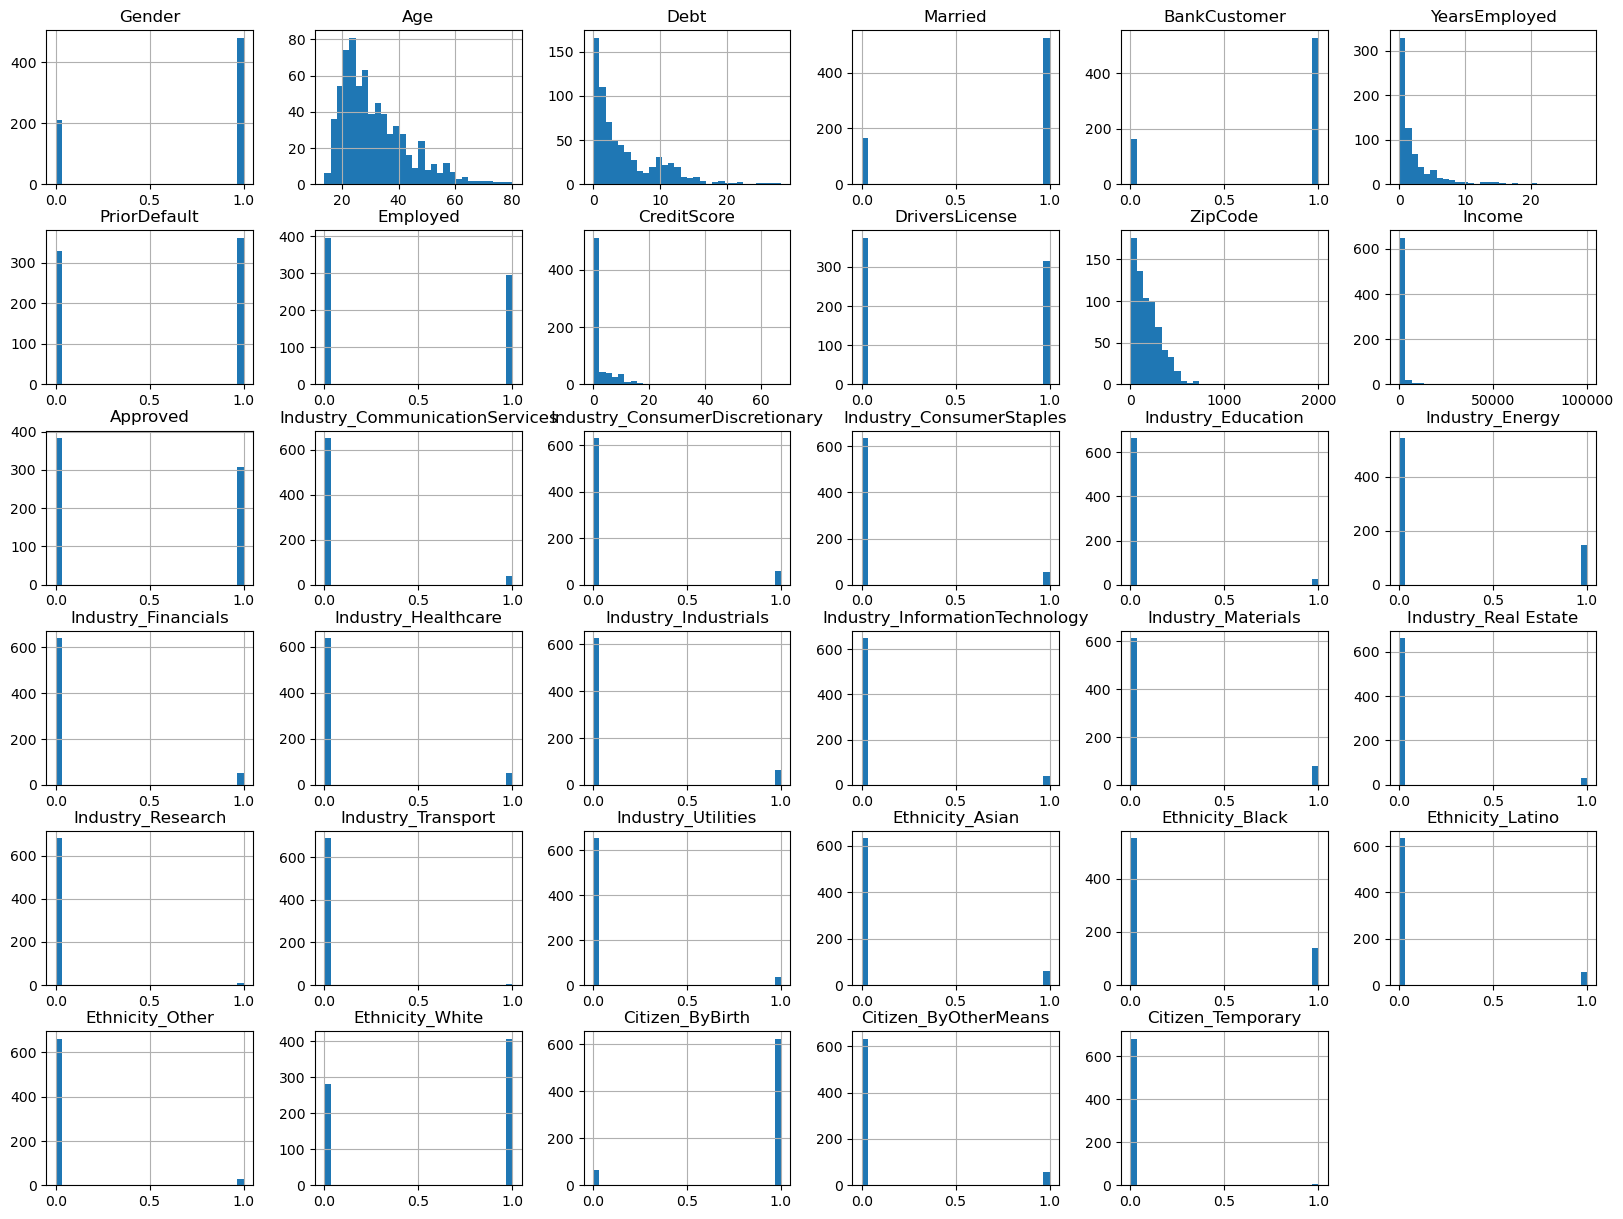

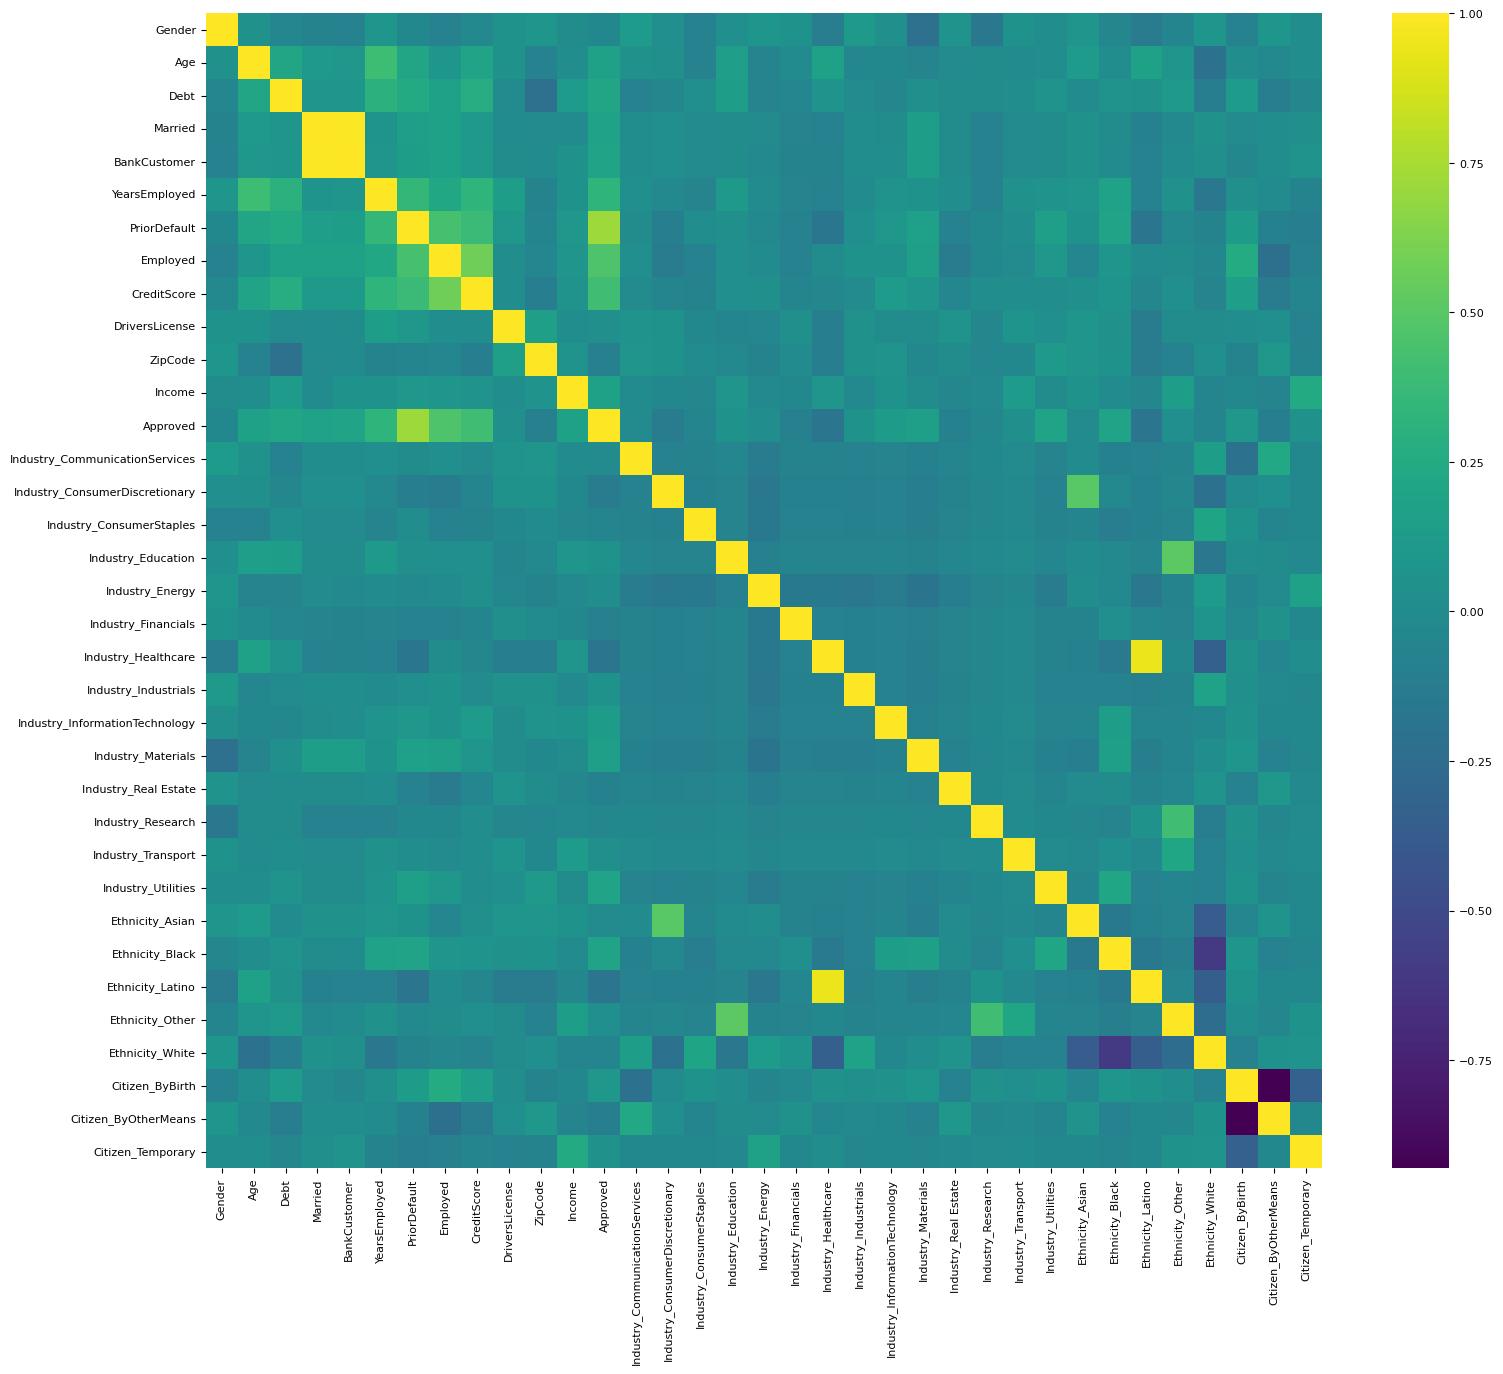

In [13]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
df.hist(bins=30, figsize=(20, 15))
plt.show()

# CALCULATE THE CORRELATION MATRIX
correlation = df.corr()

# Decrease font size
plt.rcParams['font.size'] = 8

# PLOT THE HEATMAP
plt.figure(figsize=(18, 15))
sns.heatmap(correlation, annot=False, cmap='viridis')
plt.show()

## <span style="color:red">*Q4. What do the histograms for all variables look like?*</span>

Most of the histograms are binary, where they are along the scales of 0(no), and 1(yes). Some of them however, are actually normal and have a range of values. For example, age, debt, years employed, income. These ones are mostly skewed towards the left, telling us that the lower each of the values for each of these variables are, the more likely they are to be approved. ex. If you are like 20 years old, with low debt, employed, low income, you will have a high chance of being approved. 

## <span style="color:red">*Q5. What does the correlation matrix and heatmap reveal about relationships between variables?*</span>

The correlation matrix  and heat map tells us aout the correlations between variables, where a lighter color tells us a higher relationship. For example, we can see that creditscore and approved have a decently high correlation, telling us that having a higher credit score is linked positively to being approved. In addition, things such as employed and approved also have a positive correlation, which we can see by the lighter color. 

## 6) Model Building

Model building involves training a machine learning model to make predictions based on historical data. In this case, we are predicting the likelihood of a credit card application being approved. Splitting the data into training and testing sets ensures that we can evaluate the model's performance on unseen data, providing a realistic assessment of its accuracy.

In [14]:
# DROP THE VARIABLES NOT NEEDED  
columns_to_drop = ['ZipCode', 'DriversLicense']  #Arjun Totre: I changed the variables here, These will help our model be more accurate, otherwise we will get an AUC of like 0.55 which basically is no different than a random correlation.

df = df.drop(columns=[col for col in columns_to_drop if col in df.columns]) # use of chatgpt

# SEGREGATE FEATURES AND LABELS INTO SEPARATE VARIABLES
target_column = 'Approved'         #NOTE this is the target column. Double check that this is correct!
x = df.drop(columns=[target_column])  # Features
y = df[target_column]                 # Labels


# SPLIT INTO TRAIN AND TEST USING TRAIN_TEST_SPLIT()   (30% test 70%  train)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
# test_size=0.3 is 30% test
# random_state=42 makes the randomness element reproducible, meaning that the program will produce the same result every time it is run
# (removing this will essentially output a different result each time the model is run) The use of 42 is arbitrary, it can be any integer. 
# However, a different integer will produce different random result, but it will still be the same every time. (got this explanation from chatgpt)
# stratify=Y basically makes sure that 30% is test and 70% is practice and avoids bias towards majority results (got this explanation from chatgpt)

# Confirmation
print(f"Training features shape: {x_train.shape}")
print(f"Test features shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Training features shape: (483, 32)
Test features shape: (207, 32)
Training labels shape: (483,)
Test labels shape: (207,)


**Instructions:**
1. Scale the data using MinMaxScaler to ensure that all features contribute equally to the model. Scaling is important as it brings all features to a comparable range, improving the convergence of the learning algorithm.
2. Instantiate and fit a Logistic Regression model to the training set.

In [15]:
# INSTANTIATE MINMAXSCALER AND USE IT TO RESCALE X_TRAIN AND X_TEST
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# You can try to do z-score normalization (look it up!)
standard = StandardScaler()
x_train_standard = scaler.fit_transform(x_train)
x_test_standard = scaler.transform(x_test)

# INSTANTIATE A LOGISTICREGRESSION CLASSIFIER WITH DEFAULT PARAMETER VALUES
model = LogisticRegression()

# FIT MODEL TO THE TRAIN SET
print(x_train_scaled)
model.fit(x_train_scaled, y_train)

[[1.         0.10617701 0.02964286 ... 1.         0.         0.        ]
 [1.         0.13183774 0.01482143 ... 1.         0.         0.        ]
 [1.         0.63383528 1.         ... 1.         0.         0.        ]
 ...
 [0.         0.05762139 0.33035714 ... 1.         0.         0.        ]
 [1.         0.07421635 0.25       ... 1.         0.         0.        ]
 [1.         0.50568531 0.21571429 ... 1.         0.         0.        ]]


LogisticRegression()

In [16]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
random_state=None, solver='warn', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

## <span style="color:red">*Q6. Why is it important to split the data into training and testing sets?*</span>

It is important to split the data into training and testing sets so that we can evaluate the models performance on data it hasn't been given yet. We use the training data to teach the model how to identify patterns and correlate them, while we use the testing data to assess how well the data is able to work with new information. 

## 7) Model Evaluation

Evaluating the model's performance is crucial to ensure it can accurately predict outcomes on new data. The confusion matrix and accuracy score provide insights into the model's ability to distinguish between approved and not approved applications. This is critical for minimizing false approvals and rejections, directly impacting the bank's operations and customer satisfaction.

In [17]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test_scaled)

print("Accuracy of logistic regression classifier: ", model.score(x_test_scaled, y_test))

# PRINT THE CONFUSION MATRIX OF THE LOGREG MODEL   (used chatgpt for this)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy of logistic regression classifier:  0.855072463768116
Confusion Matrix:
 [[100  15]
 [ 15  77]]


**Instructions:**
1. Calculate and plot the ROC curve for the model. The ROC curve is a graphical representation of a classifier's performance and is useful for visualizing the trade-off between the true positive rate and false positive rate at various threshold settings.

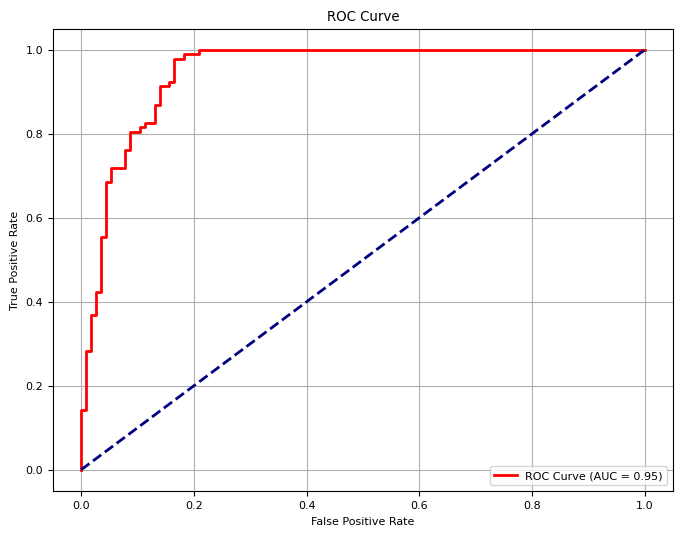

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (class 1)
y_probs = model.predict_proba(x_test_scaled)[:, 1]  # [:,1] gives prob for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="red", lw=2)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Diagonal line for random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## <span style="color:red">*Q7. Can you code a similar model for random forest?*</span>

Yes, you can. The random Forest will just use a different model but will have the same effect of fitting into the training data, making predictions on the data set, and etc. It may be slightly worse compared to our previous model, but we will see. 

In [19]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier with 200 trees 
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model on the training data
rf.fit(x_train_scaled, y_train)

# Predict 
y_pred_rf = rf.predict(x_test_scaled)

#print the accuracy on test data
accuracy = rf.score(x_test_scaled, y_test)
print("Accuracy of random forest classifier: ", accuracy)

Accuracy of random forest classifier:  0.9033816425120773


AUC for Random Forest: 0.9550567107750473


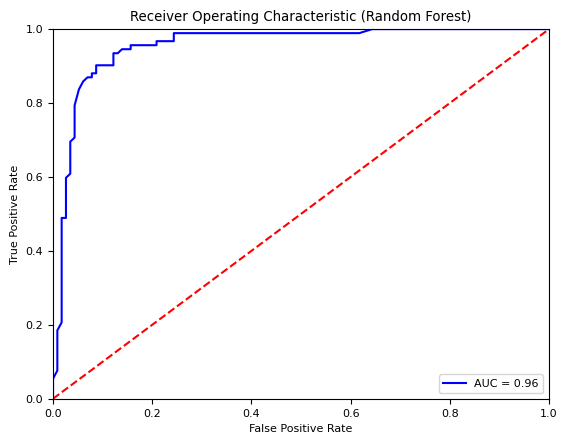

In [20]:
probs = rf.predict_proba(x_test_scaled)   
preds = probs[:,1]

# Compute false positive rate and true positive rate
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, preds)

# Compute the AUC score
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
print("AUC for Random Forest:", roc_auc_rf)

# Plot ROC Curve
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()